# Jay Parmar

## Topic : Exploratory Data Analysis on Dataset - Terrorism  :

* Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the our answers.

### Import required libraries and dataset :¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Exploratory Data Analysis (EDA) :¶

In [3]:
df.shape

(181691, 135)

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region',
                   'provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary',
                   'attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
                   'nwound':'Wound'},inplace=True)

In [6]:
df = df[['Year','Month','Day','Group','Country','State','Region','City','Latitude','Longitude','Summary','Attacktype',
         'Targettype','Weapon','kill','Wound','target1','motive']]

In [7]:
df.head()

,Year,Month,Day,Group,Country,State,Region,City,Latitude,Longitude,Summary,Attacktype,Targettype,Weapon,kill,Wound,target1,motive
0,1970,7,2,MANO-D,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Unknown,1.0,0.0,Julio Guzman,NaN
1,1970,0,0,23rd of September Communist League,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,"Nadine Chaval, daughter",NaN
2,1970,1,0,Unknown,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Unknown,1.0,0.0,Employee,NaN
3,1970,1,0,Unknown,Greece,Attica,Western Europe,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,U.S. Embassy,NaN
4,1970,1,0,Unknown,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,U.S. Consulate,NaN


In [8]:
df.shape

(181691, 18)

In [9]:
df.isnull().sum()

Year               0
Month              0
Day                0
Group              0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Summary        66129
Attacktype         0
Targettype         0
Weapon             0
kill           10313
Wound          16311
target1          636
motive        131130
dtype: int64

In [10]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Group       181691 non-null  object 
 4   Country     181691 non-null  object 
 5   State       181270 non-null  object 
 6   Region      181691 non-null  object 
 7   City        181257 non-null  object 
 8   Latitude    177135 non-null  float64
 9   Longitude   177134 non-null  float64
 10  Summary     115562 non-null  object 
 11  Attacktype  181691 non-null  object 
 12  Targettype  181691 non-null  object 
 13  Weapon      181691 non-null  object 
 14  kill        181691 non-null  float64
 15  Wound       181691 non-null  float64
 16  target1     181055 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [12]:
df.describe()

,Year,Month,Day,Latitude,Longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


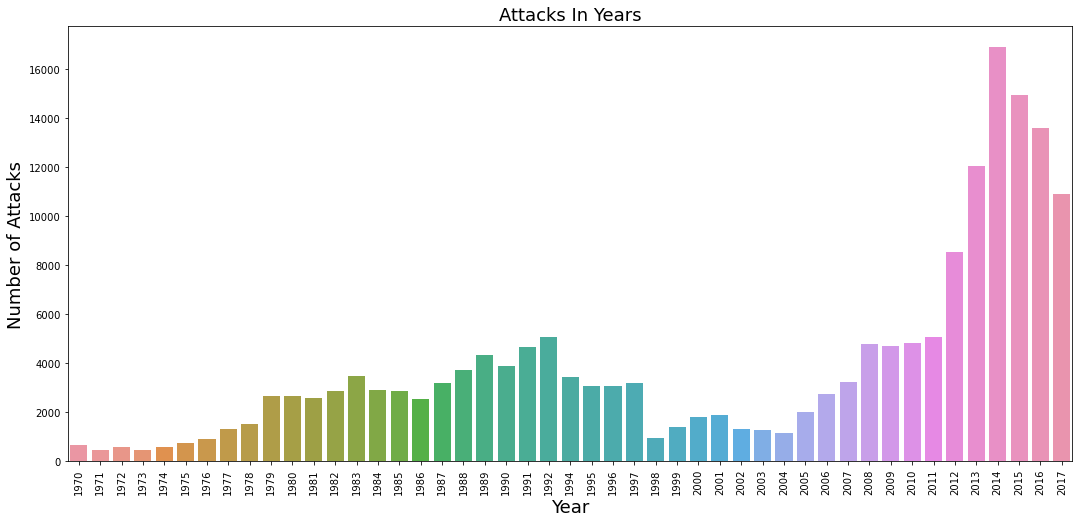

In [13]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,8))
sns.barplot(x = year, y = years_count)
plt.xticks(rotation = 90)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number of Attacks',fontsize=18)
plt.title('Attacks In Years',fontsize=18)
plt.show()

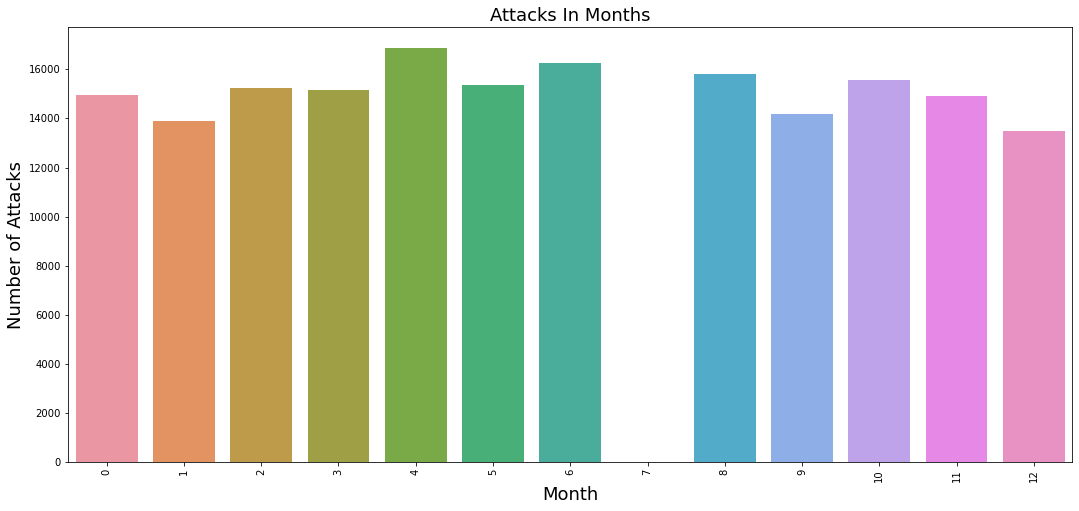

In [14]:
month = df['Month'].unique()
month_count = df['Month'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,8))
sns.barplot(x = month, y = month_count)
plt.xticks(rotation = 90)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Number of Attacks',fontsize=18)
plt.title('Attacks In Months',fontsize=18)
plt.show()

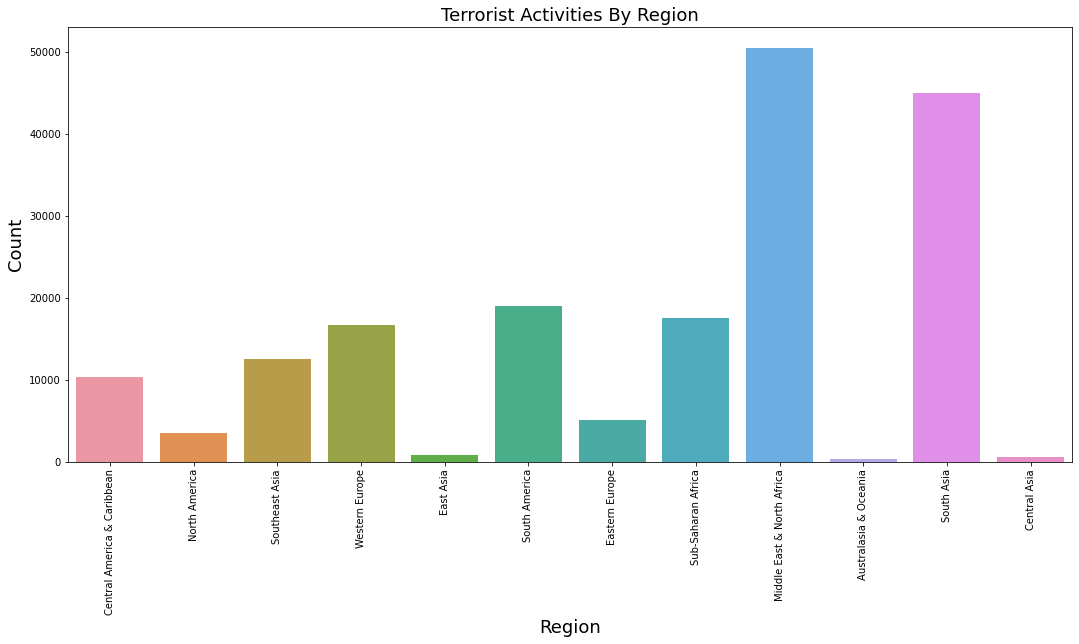

In [15]:
df['Region'].value_counts()
plt.figure(figsize=(18,8))
sns.countplot(x='Region',data=df)
plt.xticks(rotation=90)

plt.title('Terrorist Activities By Region',fontsize=18)
plt.xlabel("Region",fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

In [16]:
attack = df.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

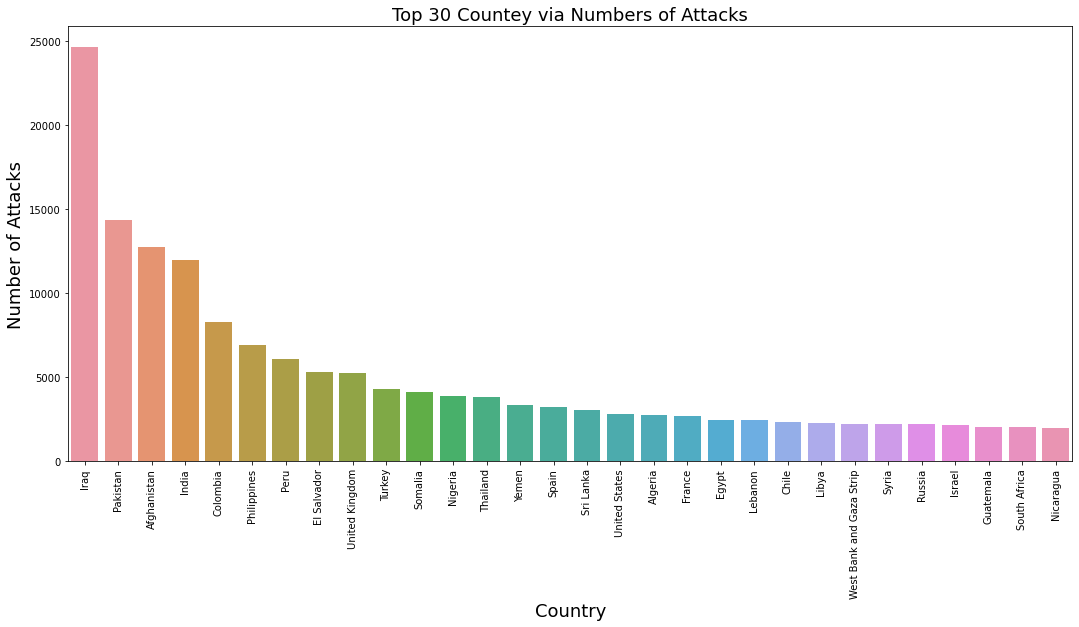

In [17]:
plt.figure(figsize = (18,8))
sns.countplot(x='Country',data=df,order = df['Country'].value_counts().index[:30])
plt.xticks(rotation = 90)
plt.xlabel('Country',fontsize=18)
plt.ylabel('Number of Attacks',fontsize=18)
plt.title('Top 30 Countey via Numbers of Attacks',fontsize=18)
plt.show()

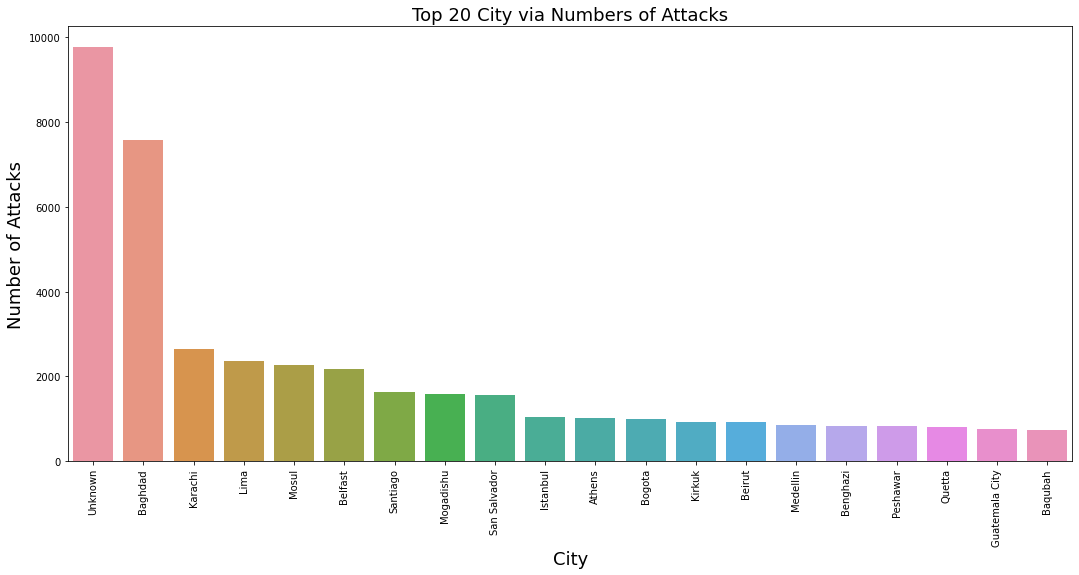

In [18]:
plt.figure(figsize = (18,8))
sns.countplot(x='City',data=df,order = df['City'].value_counts().index[:20])
plt.xticks(rotation = 90)
plt.xlabel('City',fontsize=18)
plt.ylabel('Number of Attacks',fontsize=18)
plt.title('Top 20 City via Numbers of Attacks',fontsize=18)
plt.show()

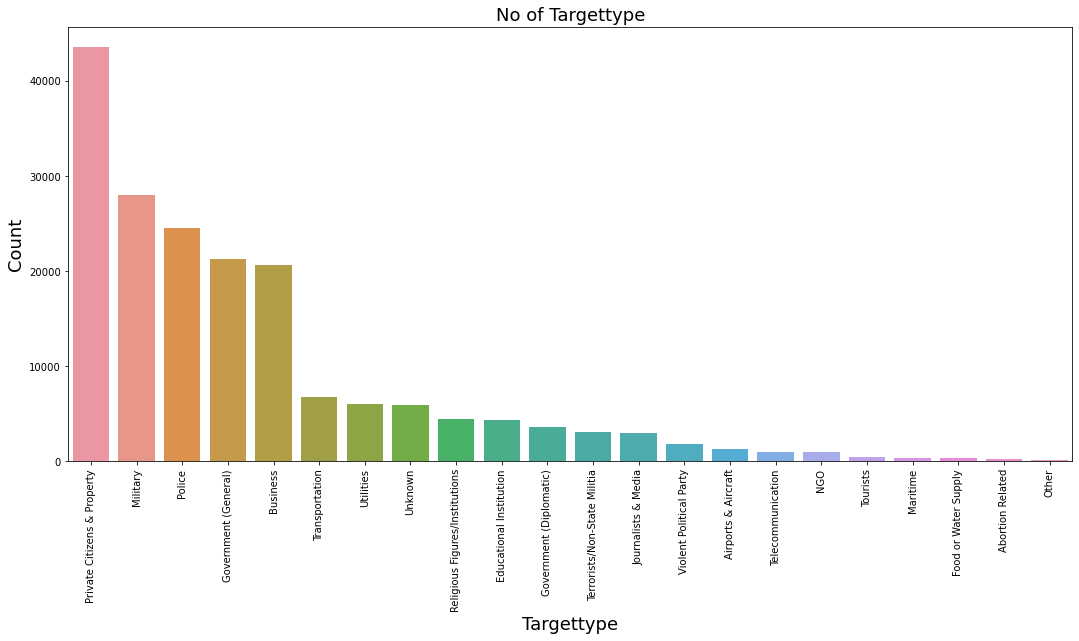

In [19]:
plt.subplots(figsize=(18,8))
sns.countplot(df["Targettype"],order=df['Targettype'].value_counts().index);
plt.xticks(rotation=90)
plt.xlabel("Targettype",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("No of Targettype",fontsize=18)
plt.show()

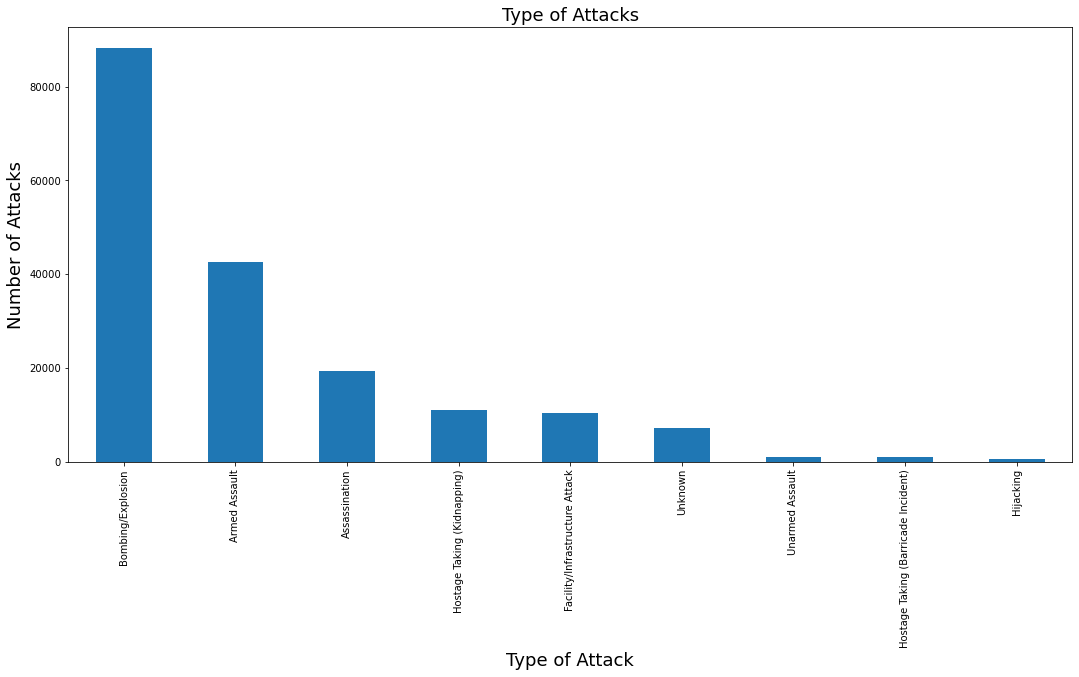

In [20]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(18,8))
plt.xticks(rotation = 90)
plt.xlabel("Type of Attack",fontsize=18)
plt.ylabel("Number of Attacks",fontsize=18)
plt.title("Type of Attacks",fontsize=18)
plt.show()

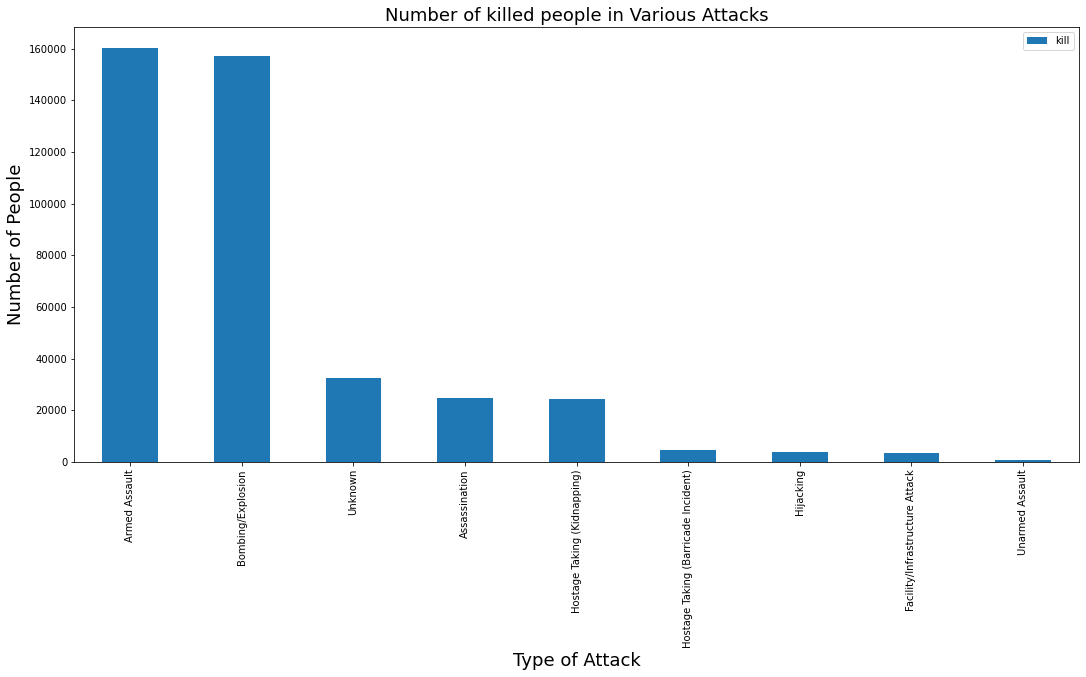

In [21]:
df[['Attacktype','kill']].groupby(['Attacktype'],axis=0).sum().sort_values('kill',ascending=False).plot(kind='bar',figsize=(18,8))

plt.xticks(rotation=90)
plt.title("Number of killed people in Various Attacks",fontsize=18)
plt.ylabel('Number of People',fontsize=18)
plt.xlabel('Type of Attack',fontsize=18)
plt.show()

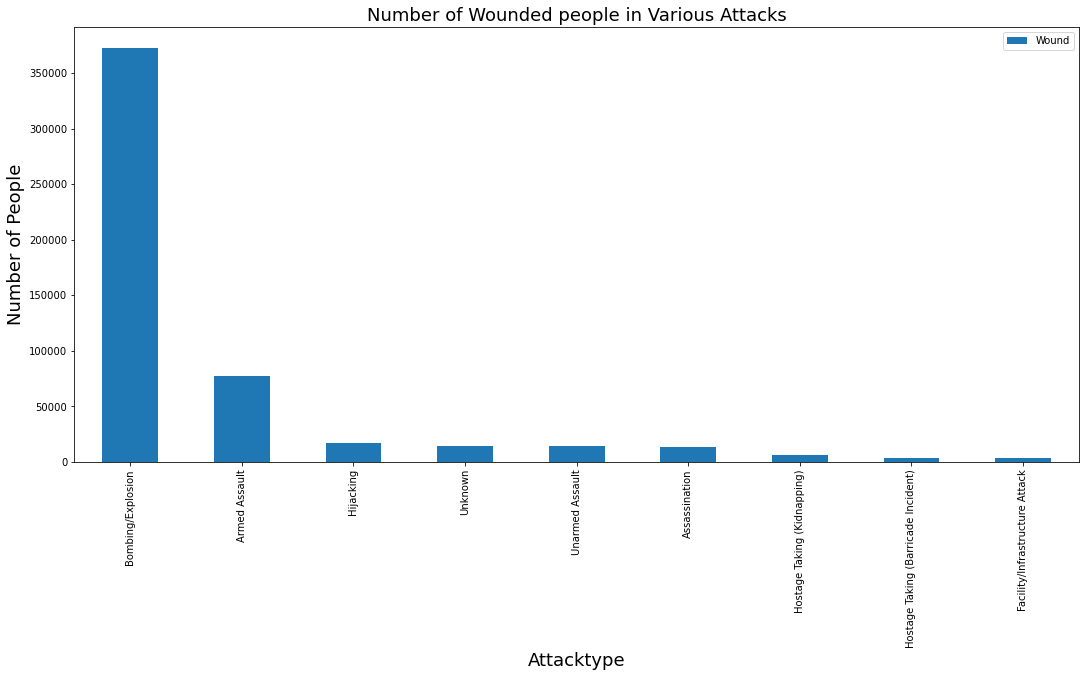

In [22]:
df[['Attacktype','Wound']].groupby(['Attacktype'],axis=0).sum().sort_values('Wound',ascending=False).plot(kind='bar',figsize=(18,8))
plt.xticks(rotation=90)
plt.title("Number of Wounded people in Various Attacks",fontsize=18)
plt.ylabel('Number of People',fontsize=18)
plt.xlabel('Attacktype',fontsize=18)
plt.show()

In [23]:
df.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

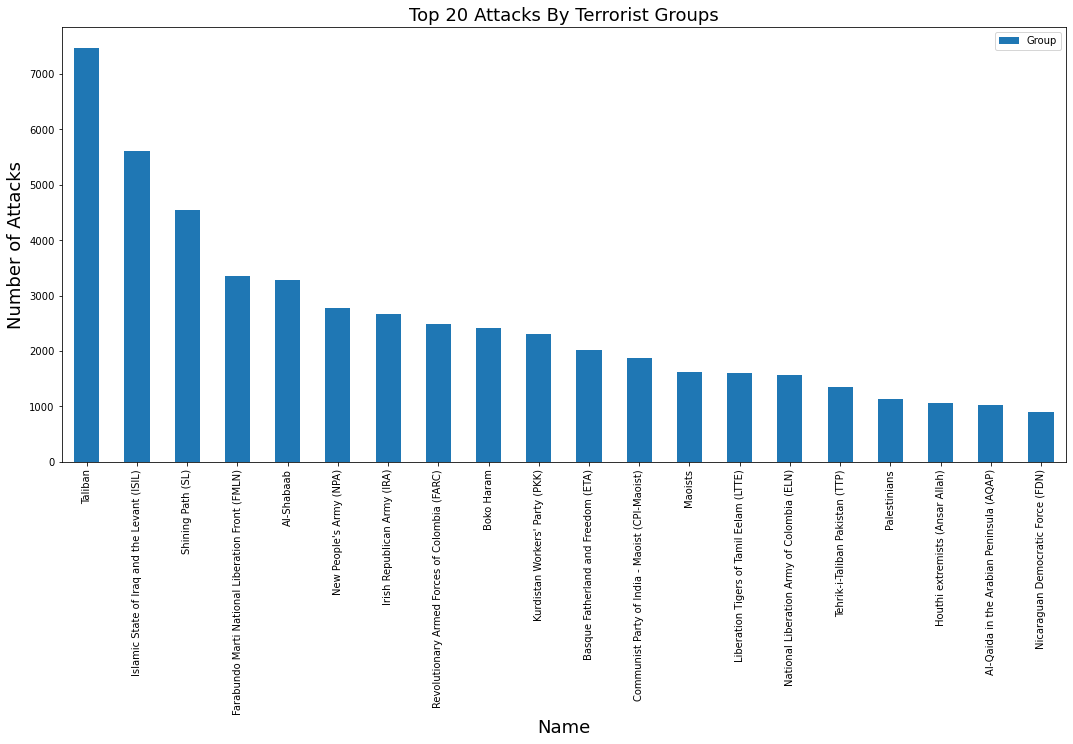

In [24]:
df['Group'].value_counts().to_frame().drop('Unknown').head(20).plot(kind='bar',figsize=(18,8))
plt.title("Top 20 Attacks By Terrorist Groups",fontsize=18)
plt.xlabel("Name",fontsize=18)
plt.ylabel("Number of Attacks",fontsize=18)
plt.show()

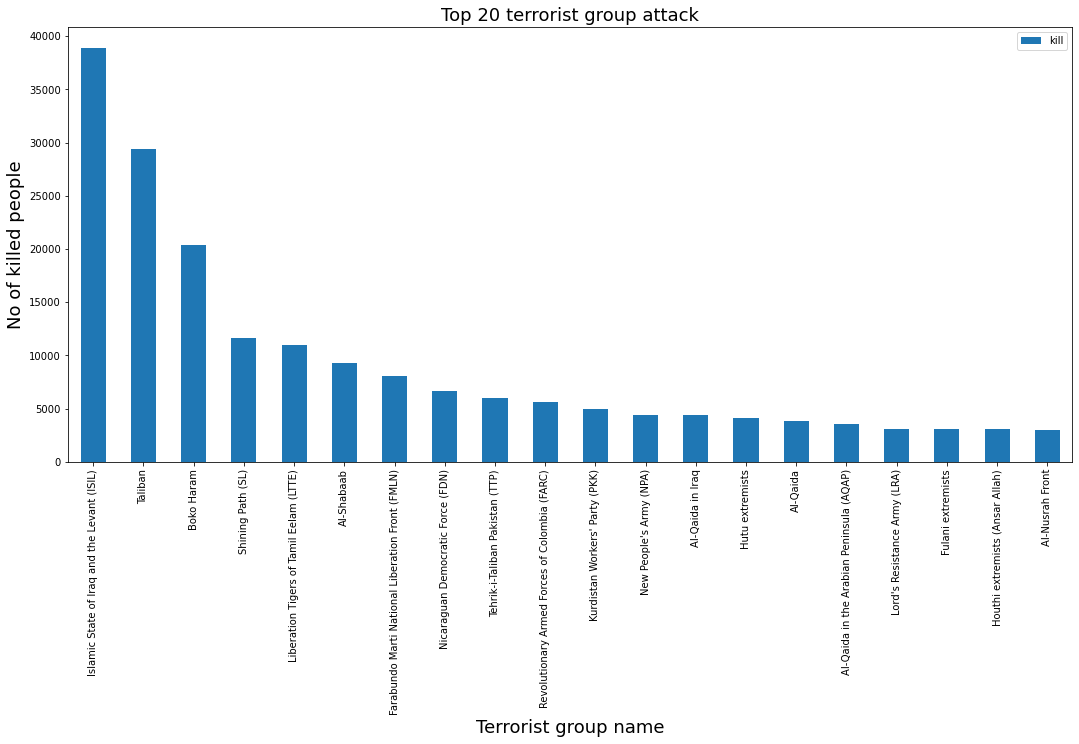

In [25]:
df[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(20).plot(kind='bar',figsize=(18,8))
plt.title("Top 20 terrorist group attack",fontsize=18)
plt.xlabel("Terrorist group name",fontsize=18)
plt.ylabel("No of killed people",fontsize=18)
plt.show()

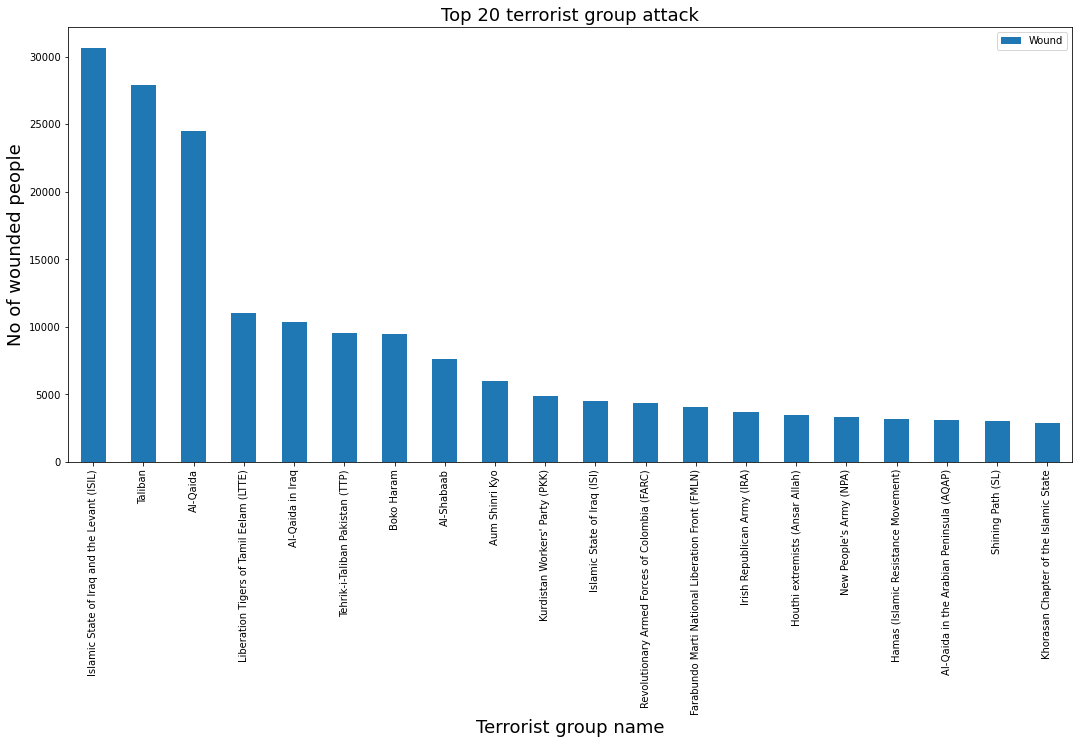

In [26]:
df[['Group','Wound']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Wound',ascending=False).head(20).plot(kind='bar',figsize=(18,8))
plt.title("Top 20 terrorist group attack",fontsize=18)
plt.xlabel("Terrorist group name",fontsize=18)
plt.ylabel("No of wounded people",fontsize=18)
plt.show()

### Conclusion and Results :


* Year with the Meximum no of attacks is **2014**

* Month with the Meximum no of attacks is **4**

* Country with the Meximum no of attacks is **Iraq**

* City with the Meximum no of attacks is **Baghdad**

* Region with the Meximum no of attacks is **Middle East & North Africa**
 
* Group with the Meximum no of attacks is **Taliban**

* Most Common Attack Types is **Bombing/Explosion**

* Most Common Targets in an Attack is **Private Citizens and Property**

* Most people killed by Attacktype is **Armed Assault**

* Most people Wounded by Attacktype is **Bombing/Explosion**

* Most people killed by Group is **Islamic state of Iraq and the Levant(ISIL)**

* Most people wounded by Group is **Islamic state of Iraq and the Levant(ISIL)**